In [1]:
#Referencia
R=8.314
dHfus=6700#J/mol
roter=0.78#g/mL
muab=122.12#g/mol
muter=74.12#g/mol

#Experimental
Vter=5.0#mL
mab=0.2504#g
macet=0.2502#g
mter=roter*Vter

def time(T,ant=[]):
    """Da los valores del tiempo para cada temperatura"""
    return [i for i in range(15*len(ant),15*(len(T)+len(ant)),15)]

T1a=[27.4,26.7,26,25.4,24.8]
T1b=[24.8,24.8,24.7,24.7,24.6,24.5,24.4,24.4,24.4,24.3,24.3,24.2,24.1]

T2a=[21.7,21.3,20.8,20.4]
T2b=[20.0,19.9,19.8,19.7,19.6,19.5,19.4,19.3,19.2,19.1,19.0,18.9,18.8,18.7]

T3a=[17.6,17.3,17.0,16.6,16.3,16.1,15.8]
T3b=[15.6,15.5,15.4,15.3,15.3,15.2,15.1,14.9,14.9,14.8]

TT=[[T1a,T2a,T3a],[T1b,T2b,T3b]]

Las temperaturas tomadas están divididas en dos listas (a y b),
a: antes de punto de fusion
b: despues de punto de fusion 

In [2]:
import matplotlib.pylab as plt
def fitin(xvals,yvals,n,men=0,mas=0):
    coefs=list(reversed(plt.polyfit(xvals,yvals,n)))
    fitx=[i for i in plt.arange(xvals[0]-men,xvals[-1]+mas,0.001)]
    fity=[]
    for x in fitx:
        suma=0
        for e in range(len(coefs)):
            term=0
            term=coefs[e]*x**e
            suma+=term
        fity.append(suma)
    return fitx,fity,coefs[0],coefs[1]

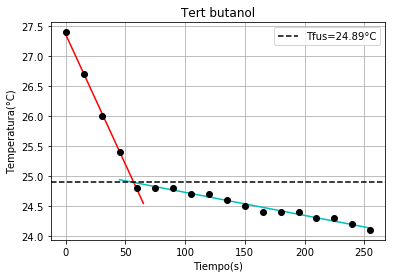

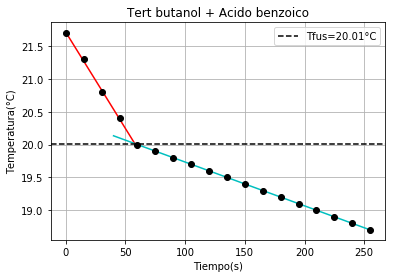

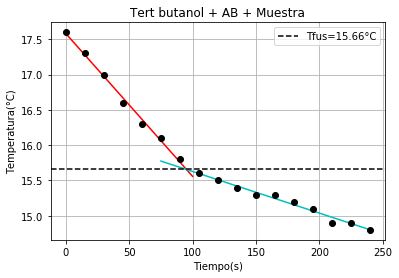

In [3]:
#Plots
def Tfus(a,b,c,d):
    return (a*d-b*c)/(d-b)
Tfes=[]
for i in range(len(TT[0])):
    Ta=TT[0][i]
    Tb=TT[1][i]
    ta=time(Ta)
    tb=time(Tb,ant=ta)
    T=Ta+Tb
    t=ta+tb
    if i==0:
        title='Tert butanol'
        mii,mif,mai,maf=0,30,5,0
    elif i==1:
        title='Tert butanol + Acido benzoico'
        mii,mif,mai,maf=0,20,15,0
    elif i==2:
        title='Tert butanol + AB + Muestra'
        mii,mif,mai,maf=0,30,10,0
    plt.figure(i+1)#Plot
    xa,ya,a,b=fitin(ta,Ta,1,mii,mai)
    xb,yb,c,d=fitin(tb,Tb,1,mif,maf)
    plt.plot(xa,ya,'r-')
    plt.plot(xb,yb,'c-')
    plt.plot(t,T,'ko')
    Tim=Tfus(a,b,c,d)
    Tfes.append(Tim)
    plt.axhline(y=Tim, color='k', linestyle='--',label=('Tfus='+str(round(Tim,2))+'°C'))
    plt.title(title)
    plt.xlabel('Tiempo(s)')
    plt.ylabel('Temperatura(°C)')
    plt.legend()
#    plt.savefig('grafic'+str(i+1)+'.png',dpi=200)
    plt.grid()
    plt.show()

Cada set de datos se divide en dos, en el punto donde cambia la tasa de cambio de la temperatura.

A partir de cada una de estas sublistas se realiza una regresión lineal, que da unos coeficientes: a,b,c,d; donde $(b,a),(d,c)$ son respectivamente la pendiente y el intercepto con el eje y de cada sublista, graficadas respectivamente en rojo y azul por claridad.

La temperatura de fusión será el punto donde se cruzan estas dos gráficas.

Despejando de la ecuación de la recta y usando los coeficientes conseguidos, se llega a la expresión $T_f=\frac{ad-bc}{d-b}$, que da las temperaturas de fusión del solvente a cada concentración.

Las temperaturas de fusión obtenidas están listadas en la Tabla 1.

In [4]:
dT=[Tfes[0]-t for t in Tfes]
molalab=1000*mab/(muab*mter)
K=dT[1]/molalab
molalab,dT[1],K,dT

(0.5257544071825107,
 4.8778265851795197,
 9.2777664220059091,
 [0.0, 4.8778265851795197, 9.2363283817923083])

La constante K es la pendiente de la gráfica de molalidad(m) vs ΔT, hallamos esta pendiente con la relación ΔT/m, usando los datos de la solución de acido benzoico:
\begin{align}
m_{ab}&=\frac{1000 w_{ab}}{M_{ab}w{ste}}\\
\Delta T&=T_{f_{puro}}-T_{f_{+AB}}\\
K_f&=\frac{\Delta T}{m}
\end{align}

Así;

\begin{align}
m_{ab}&=0.526\frac{mol_{sto}}{kg_{svte}}\\
\Delta T&=4.879 K\\
K_f&=9.28\frac{kgK}{mol}
\end{align}

In [5]:
Mac=1000*K*mab/(mter*(dT[2]-K*molalab))
Mac,dT[2],K*molalab

(136.67085856086052, 9.2363283817923083, 4.8778265851795197)

La masa molar de la acetanilida puede despejarse de la expresión:

\begin{equation}
\Delta T=K_fm
\end{equation}

Donde m es la molaridad del soluto, en este caso la suma de las molaridades individuales del acido benzoico y la acetanilida. Se llega a que:


\begin{equation}
M_{acet}=\frac{1000K_fw_{ab}}{w_{svte}(\Delta T - K_fm_{ab})}
\end{equation}

Así obtenemos:
\begin{equation}
M_{acet}=136.6709 \frac{g}{mol}
\end{equation}

In [6]:
Kref=(R*muter*(Tfes[0]+273.15)**2)/(1000*dHfus)
dHcalc=(R*muter*(Tfes[0]+273.15)**2)/(1000*K)
Macref=135.1632
def error(real,obt):
    return abs(real-obt)*100/real
error(Macref,Mac),error(Kref,K),error(dHfus,dHcalc),Kref,dHcalc

(1.1154356813544917,
 13.557629073327368,
 11.938985679749289,
 8.1700952174820358,
 5900.0879594567978)

\begin{equation}
\Delta H_{fus_{calc}}=5900.09 \frac{J}{mol}
\end{equation}

Se calcula el valor teórico de K usando el valor de referencia de ΔH y la ecuación:

\begin{equation}
\Delta H_{ref}=6700 \frac{J}{mol}\\
K_{f}=\frac{RT_f^2M_{svte}}{1000\Delta H_{fus}}
\end{equation}

Con lo que se obtiene:

\begin{align}
K_{ref}&=8.1701 \frac{kg K}{mol}
\end{align}

Los errores se calculan usando los anteriores valores y la ecuacion:

\begin{align}
er&=\frac{abs(V_{real}-V_{calc})}{V_{real}}*100\\
er(K_f)&=13.56\%\\
er(M_{acet})&=1.12\%\\
er(\Delta H_{fus})&=11.94\%
\end{align}